In [4]:
import glob
import os
import shutil

from astropy import units as u
from astropy.io import fits
from astropy.nddata import Cutout2D
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Range1d
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


# Determine where the visualization will be rendered
output_notebook()

Loading BokehJS ...

In [5]:
## Define all Paths here: 
#biyearly_image = '/Users/cmartlin/Desktop/postflash_2022_work/2018-2019_test_01_26_2022_idle02ayq_flc.fits'
#current_image = '/Users/cmartlin/Desktop/postflash_2022_work/idle02ayq/idle02ayq_flc.fits'
#yearly_image = '/Users/cmartlin/Desktop/postflash_2022_work/2018_yearly_low_10_18_2022_idn011e6s_flc.fits'

#updated_yearly = glob.glob('/Users/cmartlin/Desktop/postflash_2022_work/*10_18*')
#science_pipeline = glob.glob('/Users/cmartlin/Desktop/postflash_2022_work/i*/i*flc.fits')

In [6]:
## Define all Paths here: 
biyearly_image = '2022_ISR_testing_data/2018-2019_test_01_26_2022_idle02ayq_flc.fits'
current_image = '2022_ISR_testing_data/idle02ayq_flc.fits'
yearly_image = '2022_ISR_testing_data/2018_yearly_low_10_18_2022_idn011e6s_flc.fits'

updated_yearly = glob.glob('2022_ISR_testing_data/*10_18*')
science_pipeline = glob.glob('2022_ISR_testing_data/i*flc.fits')

In [7]:
#Checking the testing data rootnames used in function:
for f in updated_yearly: 
    print(f[-18:])
    
#Checking for year length - if this needs to change, update in function below: 
for f in updated_yearly: 
    print(f[22:26])

idn073crq_flc.fits
ibru01knq_flc.fits
ic1707bmq_flc.fits
idn011e6s_flc.fits
icmx05qlq_flc.fits
idb616edq_flc.fits
icau22uqq_flc.fits
idle02ayq_flc.fits
icw806qtq_flc.fits
ie0o61lyq_flc.fits
2020
2012
2013
2018
2015
2017
2014
2019
2016
2021


In [8]:
#Check the science data rootnames used in function:
for f in science_pipeline: 
    print(f[-18:])

icmx05qlq_flc.fits
ibru01knq_flc.fits
ie0o61lyq_flc.fits
icau22uqq_flc.fits
idn073crq_flc.fits
ic1707bmq_flc.fits
idle02ayq_flc.fits
icw806qtq_flc.fits
idn011e6s_flc.fits
idb616edq_flc.fits


In [68]:
def create_databases(input_data, positions_list):
    size = (101, 101)
    
    min_pos = []
    max_pos = []
    mean_pos = []
    median_pos = []
    std_pos = []
    
    for f in input_data: 
        image_data = fits.getdata(f,1)
        means = []
        maxes = []
        mins = []
        medians = []
        stdevs = []
        for p in positions_list: 
            cutout = Cutout2D(image_data, p, size)
            cutout1 = cutout.data
            mins.append(np.min(cutout1))
            maxes.append(np.max(cutout1))
            means.append(np.mean(cutout1))
            medians.append(np.median(cutout1))
            stdevs.append(np.std(cutout1))
        std_pos.append(stdevs)
        min_pos.append(mins)
        max_pos.append(maxes)
        mean_pos.append(means)
        median_pos.append(medians)
    filenames = []
    years = []

    for f in input_data:
        filenames.append(f[-18:])
        years.append(f[22:26]) 

    positions = [220, 900, 2100, 3500, 3600]
    positions_pipeline = ['pipe_220', 'pipe_900', 'pipe_2100', 'pipe_3500', 
                          'pipe_3600']
       
    # Condition to check if there is a year in the filename:
    if (years[0].isnumeric()) == True: 
        stdev_df = pd.DataFrame(std_pos, columns=positions, dtype = float, 
                                index=filenames)
        min_df = pd.DataFrame(min_pos, columns=positions, dtype = float, 
                                    index=filenames)
        max_df = pd.DataFrame(max_pos, columns=positions, dtype = float, 
                                    index=filenames)
        mean_df = pd.DataFrame(mean_pos, columns=positions, dtype = float, 
                                    index=filenames)
        median_df = pd.DataFrame(median_pos, columns=positions, dtype = float, 
                                    index=filenames)
        years = pd.DataFrame(years, columns=['Year'],index=filenames)
        stdev_df = pd.concat([stdev_df, years],1)
        min_df = pd.concat([min_df, years],1)
        max_df = pd.concat([max_df, years],1)
        mean_df = pd.concat([mean_df, years],1)
        median_df = pd.concat([median_df, years],1)
    else:
        stdev_df = pd.DataFrame(std_pos, columns=positions_pipeline, 
                                dtype = float, index=filenames)
        min_df = pd.DataFrame(min_pos, columns=positions_pipeline, 
                              dtype = float, index=filenames)
        max_df = pd.DataFrame(max_pos, columns=positions_pipeline, 
                              dtype = float, index=filenames)
        mean_df = pd.DataFrame(mean_pos, columns=positions_pipeline, 
                               dtype = float, index=filenames)
        median_df = pd.DataFrame(median_pos, columns=positions_pipeline, 
                                 dtype = float, index=filenames)
    
    #return stdev_df, min_df, max_df, mean_df, median_df
    return stdev_df

In [69]:
positions_list = [(220, 160), (900,700), (2100,1100), (3500,300), (3600,1700)]

stdev_yearly = create_databases(updated_yearly, positions_list)
stdev_pipeline = create_databases(science_pipeline, positions_list)

combine_by_file = pd.concat([stdev_yearly,stdev_pipeline],1)
stdev_yearly

,220,900,2100,3500,3600,Year
idn073crq_flc.fits,59.455608,146.909973,101.882736,75.528343,116.694817,2020
ibru01knq_flc.fits,342.520416,199.125153,186.972412,229.349457,159.540985,2012
ic1707bmq_flc.fits,148.863190,171.506638,165.841858,141.095657,225.459381,2013
idn011e6s_flc.fits,214.886703,163.407562,86.659470,749.148987,163.228714,2018
icmx05qlq_flc.fits,254.589401,128.186386,207.252869,187.075455,119.388161,2015
idb616edq_flc.fits,92.175880,153.568466,121.084335,141.386627,834.776855,2017
icau22uqq_flc.fits,343.667419,159.656860,308.814148,170.989120,261.431213,2014
idle02ayq_flc.fits,171.926636,150.326370,124.541191,296.028015,219.179977,2019
icw806qtq_flc.fits,169.381790,115.483795,113.963699,155.445801,157.094360,2016
ie0o61lyq_flc.fits,537.550842,69.527336,124.061958,143.284286,73.426285,2021


In [71]:
combine_by_file['220_norm'] = (combine_by_file[220] - combine_by_file['pipe_220']) / combine_by_file['pipe_220']
combine_by_file['900_norm'] = (combine_by_file[900] - combine_by_file['pipe_900']) / combine_by_file['pipe_900']
combine_by_file['2100_norm'] = (combine_by_file[2100] - combine_by_file['pipe_2100']) / combine_by_file['pipe_2100']
combine_by_file['3500_norm'] = (combine_by_file[3500] - combine_by_file['pipe_3500']) / combine_by_file['pipe_3500']
combine_by_file['3600_norm'] = (combine_by_file[3600] - combine_by_file['pipe_3600']) / combine_by_file['pipe_3600']

stdev_sorted_by_year = combine_by_file.sort_values(by=['Year'])
stdev_sorted_by_year

,220,900,2100,3500,3600,Year,pipe_220,pipe_900,pipe_2100,pipe_3500,pipe_3600,220_norm,900_norm,2100_norm,3500_norm,3600_norm
ibru01knq_flc.fits,342.520416,199.125153,186.972412,229.349457,159.540985,2012,342.520325,199.125290,186.972641,229.349670,159.541183,2.672914e-07,-6.896618e-07,-1.224146e-06,-9.314295e-07,-1.243342e-06
ic1707bmq_flc.fits,148.863190,171.506638,165.841858,141.095657,225.459381,2013,148.863098,171.507019,165.842041,141.095428,225.459396,6.150130e-07,-2.224222e-06,-1.104096e-06,1.622178e-06,-6.767866e-08
icau22uqq_flc.fits,343.667419,159.656860,308.814148,170.989120,261.431213,2014,343.667511,159.656708,308.813965,170.989304,261.431244,-2.663992e-07,9.557249e-07,5.929313e-07,-1.070859e-06,-1.167327e-07
icmx05qlq_flc.fits,254.589401,128.186386,207.252869,187.075455,119.388161,2015,254.589066,128.186646,207.252594,187.075974,119.388451,1.318569e-06,-2.023607e-06,1.325234e-06,-2.773199e-06,-2.428350e-06
icw806qtq_flc.fits,169.381790,115.483795,113.963699,155.445801,157.094360,2016,169.381577,115.483780,113.963936,155.446228,157.094254,1.261194e-06,1.321293e-07,-2.075316e-06,-2.748514e-06,6.799200e-07
idb616edq_flc.fits,92.175880,153.568466,121.084335,141.386627,834.776855,2017,92.175674,153.568649,121.084274,141.386963,834.776489,2.234794e-06,-1.192336e-06,5.040717e-07,-2.374288e-06,4.386934e-07
idn011e6s_flc.fits,214.886703,163.407562,86.659470,749.148987,163.228714,2018,214.886932,163.407242,86.659416,749.148621,163.228516,-1.065127e-06,1.960957e-06,6.162719e-07,4.888362e-07,1.215255e-06
idle02ayq_flc.fits,171.926636,150.326370,124.541191,296.028015,219.179977,2019,171.926056,150.326340,124.540825,296.028015,219.180389,3.372578e-06,2.030089e-07,2.940489e-06,0.000000e+00,-1.879672e-06
idn073crq_flc.fits,59.455608,146.909973,101.882736,75.528343,116.694817,2020,59.455494,146.909882,101.882095,75.528603,116.694672,1.924817e-06,6.231898e-07,6.290302e-06,-3.434453e-06,1.242203e-06
ie0o61lyq_flc.fits,537.550842,69.527336,124.061958,143.284286,73.426285,2021,537.551147,69.527451,124.061943,143.284241,73.425659,-5.677149e-07,-1.645982e-06,1.229933e-07,3.194794e-07,8.520323e-06


In [72]:
x = list([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
#x2 = list([5,1,4,6,3,2])
x3 = list([1, 2, 3, 4, 5, 6])
y = list(sorted_by_year['220_norm'].values)
y2 = list(sorted_by_year['900_norm'].values)
y3 = list(sorted_by_year['2100_norm'].values)
y4 = list(sorted_by_year['3500_norm'].values)
y5 = list(sorted_by_year['3600_norm'].values)

p = figure(title = 'Checking Stdev')
p.line(x,y)
p.line(x,y2)
p.line(x,y3)
p.line(x,y4)
p.line(x,y5)
show(p)

NameError: name 'sorted_by_year' is not defined

(array([   643.,    666.,    723.,    719.,    739.,    816.,    915.,
           941.,   1061.,   1111.,   1277.,   1367.,   1569.,   1825.,
          2161.,   2409.,   2817.,   3364.,   3956.,   4671.,   5562.,
          6631.,   7972.,   9539.,  11275.,  13703.,  16312.,  19301.,
         22560.,  26969.,  31180.,  36891.,  43175.,  49923.,  57091.,
         65904.,  74108.,  84133.,  94028., 104371., 115415., 126510.,
        137840., 148505., 159672., 170637., 180596., 191335., 201464.,
        209764., 219312., 227144., 234801., 242013., 247826., 251255.,
        254042., 253631., 251720., 246686., 238876., 229877., 219277.,
        207062., 196106., 184100., 173110., 163102., 153989., 143220.,
        132470., 121327., 111182., 101558.,  92163.,  84474.,  76432.,
         69519.,  63864.,  57189.,  52526.,  47010.,  42017.,  37159.,
         33284.,  29613.,  26022.,  23105.,  20558.,  17907.,  16148.,
         13844.,  12503.,  11287.,   9930.,   8607.,   8039.,   7187.,
      

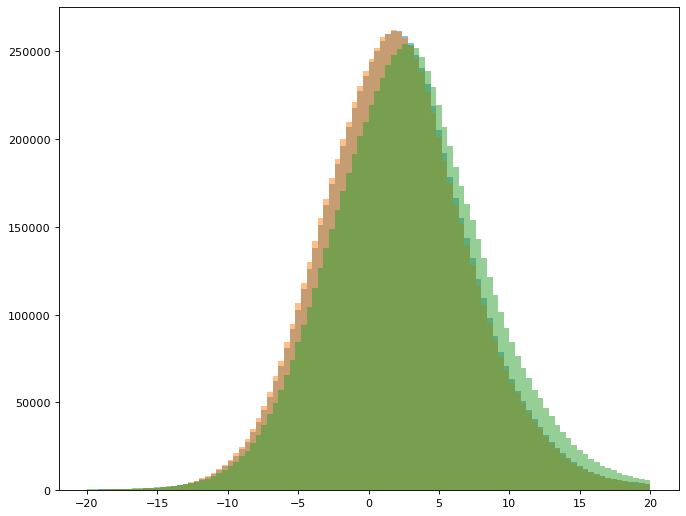

In [73]:
image_biyearly = fits.getdata(biyearly_image,1)
image_curr = fits.getdata(current_image,1)
image_yearly = fits.getdata(yearly_image,1)

figure(figsize=(10, 8), dpi=80)

plt.hist(image_biyearly.flatten(),alpha=0.5, range=(-20,20), bins=100)
plt.hist(image_curr.flatten(),alpha=0.5, range=(-20,20), bins=100)
plt.hist(image_yearly.flatten(),alpha=0.5, range=(-20,20), bins=100)

(array([   308.,    335.,    320.,    346.,    350.,    373.,    361.,
           358.,    382.,    357.,    432.,    384.,    462.,    453.,
           475.,    466.,    550.,    511.,    567.,    544.,    603.,
           674.,    665.,    702.,    757.,    812.,    875.,    950.,
          1055.,   1106.,   1134.,   1275.,   1294.,   1523.,   1618.,
          1746.,   1865.,   2091.,   2235.,   2436.,   2689.,   2873.,
          3161.,   3470.,   3849.,   4123.,   4528.,   5011.,   5428.,
          5847.,   6463.,   7240.,   7901.,   8411.,   9327.,   9974.,
         10848.,  11712.,  12877.,  14092.,  14919.,  16261.,  17618.,
         19273.,  20866.,  22309.,  24095.,  25828.,  27483.,  29608.,
         32090.,  33814.,  36006.,  38102.,  40818.,  43315.,  45766.,
         48262.,  50871.,  53500.,  56123.,  59292.,  61749.,  64761.,
         67609.,  70231.,  72787.,  75718.,  78206.,  81466.,  84011.,
         86626.,  89019.,  91577.,  94463.,  96872.,  99462., 102002.,
      

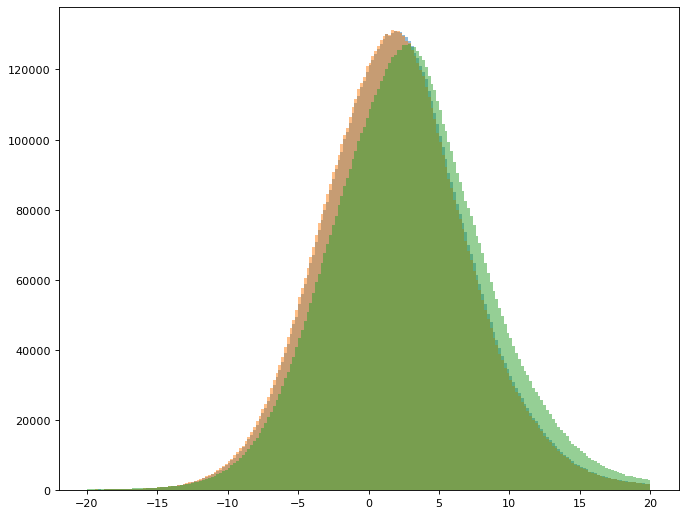

In [74]:
position = (220,160)
size = (101, 101)

cutout_biyearly = Cutout2D(image_biyearly, position , size)
cutout1_biyearly = cutout_biyearly.data

cutout_yearly = Cutout2D(image_yearly, position , size)
cutout1_yearly = cutout_yearly.data

cutout_curr = Cutout2D(image_curr, position , size)
cutout1_curr = cutout_curr.data

figure(figsize=(10, 8), dpi=80)

plt.hist(image_biyearly.flatten(),alpha=0.5, range=(-20,20), bins=200)
plt.hist(image_curr.flatten(),alpha=0.5, range=(-20,20), bins=200)
plt.hist(image_yearly.flatten(),alpha=0.5, range=(-20,20), bins=200)

In [76]:
def create_databases(input_data, positions_list):
    size = (101, 101)
    
    min_pos = []
    max_pos = []
    mean_pos = []
    median_pos = []
    std_pos = []
    
    for f in input_data: 
        image_data = fits.getdata(f,1)
        means = []
        maxes = []
        mins = []
        medians = []
        stdevs = []
        for p in positions_list: 
            cutout = Cutout2D(image_data, p, size)
            cutout1 = cutout.data
            mins.append(np.min(cutout1))
            maxes.append(np.max(cutout1))
            means.append(np.mean(cutout1))
            medians.append(np.median(cutout1))
            stdevs.append(np.std(cutout1))
        std_pos.append(stdevs)
        min_pos.append(mins)
        max_pos.append(maxes)
        mean_pos.append(means)
        median_pos.append(medians)
    filenames = []
    years = []

    for f in input_data:
        filenames.append(f[-18:])
        years.append(f[22:26]) 

    positions = ['stdev_220', 'stdev_900', 'stdev_2100', 'stdev_3500', 
                 'stdev_3600']
    positions_min = ['min_220', 'min_900', 'min_2100', 'min_3500', 
                          'min_3600']
    positions_max = ['max_220', 'max_900', 'max_2100', 'max_3500', 
                          'max_3600']
    positions_mean = ['mean_220', 'mean_900', 'mean_2100', 'mean_3500', 
                          'mean_3600']
    positions_med = ['med_220', 'med_900', 'med_2100', 'med_3500', 
                          'med_3600']
    positions_pipeline = ['pipe_220', 'pipe_900', 'pipe_2100', 'pipe_3500', 
                          'pipe_3600']
    pos_minpipe = ['min_pipe_220', 'min_pipe_900', 'min_pipe_2100', 
                   'min_pipe_3500', 'min_pipe_3600']
    pos_maxpipe = ['max_pipe_220', 'max_pipe_900', 'max_pipe_2100', 
                   'max_pipe_3500', 'max_pipe_3600']
    pos_meanpipe = ['mean_pipe_220', 'mean_pipe_900', 'mean_pipe_2100', 
                    'mean_pipe_3500', 'mean_pipe_3600']
    pos_medpipe = ['mean_pipe_220', 'mean_pipe_900', 'mean_pipe_2100', 
                   'mean_pipe_3500', 'mean_pipe_3600']
       
    # Condition to check if there is a year in the filename:
    if (years[0].isnumeric()) == True: 
        stdev_df = pd.DataFrame(std_pos, columns=positions, dtype = float, 
                                index=filenames)
        min_df = pd.DataFrame(min_pos, columns=positions_min, dtype = float, 
                                    index=filenames)
        max_df = pd.DataFrame(max_pos, columns=positions_max, dtype = float, 
                                    index=filenames)
        mean_df = pd.DataFrame(mean_pos, columns=positions_mean, dtype = float, 
                                    index=filenames)
        median_df = pd.DataFrame(median_pos, columns=positions_med, dtype = float, 
                                    index=filenames)
        years = pd.DataFrame(years,columns=['Year'], index=filenames)
        stdev_df = pd.concat([stdev_df, years],1)
        min_df = pd.concat([min_df, years],1)
        max_df = pd.concat([max_df, years],1)
        mean_df = pd.concat([mean_df, years],1)
        median_df = pd.concat([median_df, years],1)
    else:
        stdev_df = pd.DataFrame(std_pos, columns=positions_pipeline, 
                                dtype = float, index=filenames)
        min_df = pd.DataFrame(min_pos, columns=pos_minpipe, 
                              dtype = float, index=filenames)
        max_df = pd.DataFrame(max_pos, columns=pos_maxpipe, 
                              dtype = float, index=filenames)
        mean_df = pd.DataFrame(mean_pos, columns=pos_meanpipe, 
                               dtype = float, index=filenames)
        median_df = pd.DataFrame(median_pos, columns=pos_medpipe, 
                                 dtype = float, index=filenames)
    
    return stdev_df, min_df, max_df, mean_df, median_df

In [77]:
positions_list = [(220, 160), (900,700), (2100,1100), (3500,300), (3600,1700)]

stdev_yearly, min_yearly, max_yearly, mean_yearly, median_yearly = create_databases(updated_yearly, positions_list)
yearly_stats = pd.concat([stdev_yearly,min_yearly, max_yearly, mean_yearly, median_yearly],1)


In [82]:
yearly_stats = yearly_stats.T.drop_duplicates().T
yearly_stats = yearly_stats.sort_values(by=['Year'])

yearly_stats.T

,ibru01knq_flc.fits,ic1707bmq_flc.fits,icau22uqq_flc.fits,icmx05qlq_flc.fits,icw806qtq_flc.fits,idb616edq_flc.fits,idn011e6s_flc.fits,idle02ayq_flc.fits,idn073crq_flc.fits,ie0o61lyq_flc.fits
stdev_220,342.52,148.863,343.667,254.589,169.382,92.1759,214.887,171.927,59.4556,537.551
stdev_900,199.125,171.507,159.657,128.186,115.484,153.568,163.408,150.326,146.91,69.5273
stdev_2100,186.972,165.842,308.814,207.253,113.964,121.084,86.6595,124.541,101.883,124.062
stdev_3500,229.349,141.096,170.989,187.075,155.446,141.387,749.149,296.028,75.5283,143.284
stdev_3600,159.541,225.459,261.431,119.388,157.094,834.777,163.229,219.18,116.695,73.4263
Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
min_220,-100.438,-165.179,-87.3119,-199.35,-256.027,-57.0903,-126.184,-302.089,-75.9424,-106.617
min_900,-141.172,-344.633,-35.1902,-93.4637,-87.2927,-97.419,-33.8592,-70.5343,-76.4944,-30.4153
min_2100,-56.6964,-175.646,-53.8424,-385.915,-175.677,-128.329,-43.5269,-45.0032,-119.36,-69.6143
min_3500,-176.815,-194.011,-79.4664,-181.029,-76.6418,-41.4627,-41.009,-145.276,-82.3409,-32.3397
